# Бинарная классификация абитуриентов по статусу подачи/неподачи заявлений на зачисление в ВУЗ

## Подготовка данных

Загрузим датасет с локального компьютера в Colab

In [ ]:
from google.colab import files


uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset12.xlsx to dataset12.xlsx
User uploaded file "dataset12.xlsx" with length 2403925 bytes


Импорт необходимых библиотек:

In [ ]:
import pandas as pd
import numpy as np

Считывание данных из загруженного файла в переменную:

In [ ]:
df = pd.read_excel('dataset12.xlsx')

Вывод сведений о датасете:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55228 entries, 0 to 55227
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ОснованиеПоступления          55228 non-null  object
 1   Приоритет                     55228 non-null  int64 
 2   Факультет                     55228 non-null  object
 3   КодСпециальности              55228 non-null  object
 4   УровеньБюджета                55228 non-null  object
 5   УровеньПодготовки             55228 non-null  object
 6   Льгота                        55228 non-null  int64 
 7   ВидПредоставленныхДокументов  55228 non-null  object
 8   ФормаОбучения                 55228 non-null  object
 9   СуммаБаллов                   55228 non-null  int64 
 10  КоличествоПредметов           55228 non-null  int64 
 11  Состояние                     29184 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.1+ MB


Первые 20 строк датасета:

In [ ]:
df.head(20)

,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,УровеньПодготовки,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов,Состояние
0,ЦН,2,"Институт цифровых технологий, электроники и фи...",10.03.01,Федеральный бюджет,Бакалавр,0,Копия,Очная,0,4,NaN
1,БН,1,"Институт цифровых технологий, электроники и фи...",03.04.03,Федеральный бюджет,Магистр,0,Копия,Очная,0,1,Является студентом
2,ДН,2,Институт искусств и дизайна,09.03.03,Внебюджетные средства,Бакалавр,0,Копия,Очная,0,4,NaN
3,ДН,0,Рубцовский институт (филиал) АлтГУ,40.02.02,Внебюджетные средства,СПО,0,Копия,Очная,0,1,NaN
4,ДН,3,Колледж,40.02.01,Внебюджетные средства,СПО,0,Копия,Очная,0,1,NaN
5,ДН,1,"Международный институт экономики, менеджмента ...",38.05.01,Внебюджетные средства,Специалист,0,Копия,Очная,0,4,Является студентом
6,ЦН,3,Институт истории и международных отношений,41.03.05,Федеральный бюджет,Бакалавр,0,Копия,Очная,0,4,Является студентом
7,ДН,1,Колледж,40.02.01,Внебюджетные средства,СПО,0,Копия,Очная,0,1,Является студентом
8,БН,3,"Институт массовых коммуникаций, филологии и по...",45.03.02,Федеральный бюджет,Бакалавр,0,Копия,Очная,0,4,NaN
9,БН,1,Институт психологии,37.03.01,Федеральный бюджет,Бакалавр,0,Копия,Очная,0,4,NaN


Вывод описательной статистики по датасету:

In [ ]:
df.describe(include = 'all')

,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,УровеньПодготовки,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов,Состояние
count,55228,55228.000000,55228,55228,55228,55228,55228.000000,55228,55228,55228.000000,55228.000000,29184
unique,4,NaN,18,138,2,5,NaN,2,3,NaN,NaN,3
top,БН,NaN,Колледж,09.03.03,Федеральный бюджет,Бакалавр,NaN,Копия,Очная,NaN,NaN,Является студентом
freq,34723,NaN,9106,2395,35603,32202,NaN,47840,48107,NaN,NaN,28539
mean,NaN,2.077171,NaN,NaN,NaN,NaN,0.016369,NaN,NaN,17.843467,3.108097,NaN
std,NaN,1.482823,NaN,NaN,NaN,NaN,0.126889,NaN,NaN,51.811016,1.249598,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,2.000000,NaN
50%,NaN,2.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,4.000000,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,4.000000,NaN


Подсчет количества вариантов значений, встречающихся в датасете:

In [ ]:
df['Состояние'].value_counts()

Является студентом     28539
Является аспирантом      419
Отчислен                 226
Name: Состояние, dtype: int64

In [ ]:
df['УровеньПодготовки'].value_counts()

Бакалавр       32202
СПО            11515
Магистр         7131
Специалист      3726
Аспирантура      654
Name: УровеньПодготовки, dtype: int64

In [ ]:
df['СуммаБаллов'].value_counts()

0      46821
2        864
80       166
85       158
75       157
       ...  
283        1
270        1
17         1
275        1
22         1
Name: СуммаБаллов, Length: 260, dtype: int64

In [ ]:
df['Льгота'].value_counts()

0    54324
1      904
Name: Льгота, dtype: int64

Выделим для дальнейших расчетов только строки, описывающие поступающих в бакалавриат:

In [ ]:
data = df.loc[df.УровеньПодготовки=='Бакалавр'].reset_index(drop=True)

Поскольку остались только поступающив в бакалавриат, переменная 'УровеньПодготовки' больше не нужна, удалим этот столбец:

In [ ]:
data = data.drop('УровеньПодготовки', axis = 1)

Снова отобразим информацию об обновленном датасете:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32202 entries, 0 to 32201
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ОснованиеПоступления          32202 non-null  object
 1   Приоритет                     32202 non-null  int64 
 2   Факультет                     32202 non-null  object
 3   КодСпециальности              32202 non-null  object
 4   УровеньБюджета                32202 non-null  object
 5   Льгота                        32202 non-null  int64 
 6   ВидПредоставленныхДокументов  32202 non-null  object
 7   ФормаОбучения                 32202 non-null  object
 8   СуммаБаллов                   32202 non-null  int64 
 9   КоличествоПредметов           32202 non-null  int64 
 10  Состояние                     14939 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [ ]:
data.head(20)

,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов,Состояние
0,ЦН,2,"Институт цифровых технологий, электроники и фи...",10.03.01,Федеральный бюджет,0,Копия,Очная,0,4,NaN
1,ДН,2,Институт искусств и дизайна,09.03.03,Внебюджетные средства,0,Копия,Очная,0,4,NaN
2,ЦН,3,Институт истории и международных отношений,41.03.05,Федеральный бюджет,0,Копия,Очная,0,4,Является студентом
3,БН,3,"Институт массовых коммуникаций, филологии и по...",45.03.02,Федеральный бюджет,0,Копия,Очная,0,4,NaN
4,БН,1,Институт психологии,37.03.01,Федеральный бюджет,0,Копия,Очная,0,4,NaN
5,ДН,1,"Институт массовых коммуникаций, филологии и по...",45.03.02,Внебюджетные средства,0,Копия,Очная,101,4,NaN
6,БН,3,Институт географии,35.03.10,Федеральный бюджет,0,Копия,Очная,0,4,Является студентом
7,БН,2,Институт географии,43.03.03,Федеральный бюджет,0,Оригинал,Заочная,0,4,Является студентом
8,БН,1,Институт искусств и дизайна,44.03.04,Федеральный бюджет,0,Копия,Заочная,227,4,Является студентом
9,БН,8,Институт искусств и дизайна,50.03.03,Федеральный бюджет,0,Копия,Заочная,0,4,NaN


Посмотрим, как теперь выглядит целевая переменная:

In [ ]:
data['Состояние'].value_counts()

Является студентом    14764
Отчислен                175
Name: Состояние, dtype: int64

Заполняем NaN нулями

In [ ]:
data = data.fillna(0)

In [ ]:
data['Состояние'].value_counts()

0                     17263
Является студентом    14764
Отчислен                175
Name: Состояние, dtype: int64

Сделаем замену: поступивших (Состояние='Является студентом') промаркируем 1, а остальных - 0.

In [ ]:
data['Состояние'] = data['Состояние'].apply(lambda x: 1 if x=='Является студентом' else 0)

In [ ]:
data['Состояние'].value_counts()

0    17438
1    14764
Name: Состояние, dtype: int64

Данная выборка почти сбалансирована, но иногда балансировка всё же требуется, если представительство классов в датасете принципиально различается. О балансировке классов https://loginom.ru/blog/imbalance-class, а также https://notebook.community/Diyago/Machine-Learning-scripts/classification/Preprocessing_Log%20reg

Получим список категориальных переменных:

In [ ]:
names = list(data.columns[data.dtypes=='object'])
names

['ОснованиеПоступления',
 'Факультет',
 'КодСпециальности',
 'УровеньБюджета',
 'ВидПредоставленныхДокументов',
 'ФормаОбучения']

Найдемуникальные  варианты значений для первой такой переменной:

In [ ]:
ind = list(pd.unique(data['ОснованиеПоступления']))
ind


['ЦН', 'ДН', 'БН', 'ЛН']

Найдем для примера индекс строки 'ДН' в полученном списке:

In [ ]:
ind.index('ДН')

1

Пример преобразования категорий в числа (закоментирован, т.к. выполнится в составе ниже следующего цикла):

In [ ]:
#data['ОснованиеПоступления'] = data['ОснованиеПоступления'].apply(lambda x: ind.index(x))

In [ ]:
#data['ОснованиеПоступления']

Преобразование категорий в числа для всех категориальных переменных:

In [ ]:
for name in names:
  ind = list(pd.unique(data[name]))
  data[name] = data[name].apply(lambda x: ind.index(x))

Обзор преобразованного датасета

In [ ]:
data.head(10)

,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов,Состояние
0,0,2,0,0,0,0,0,0,0,4,0
1,1,2,1,1,1,0,0,0,0,4,0
2,0,3,2,2,0,0,0,0,0,4,1
3,2,3,3,3,0,0,0,0,0,4,0
4,2,1,4,4,0,0,0,0,0,4,0
5,1,1,3,3,1,0,0,0,101,4,0
6,2,3,5,5,0,0,0,0,0,4,1
7,2,2,5,6,0,0,1,1,0,4,1
8,2,1,1,7,0,0,0,1,227,4,1
9,2,8,1,8,0,0,0,1,0,4,0


## Визуализация данных и корреляционная матрица

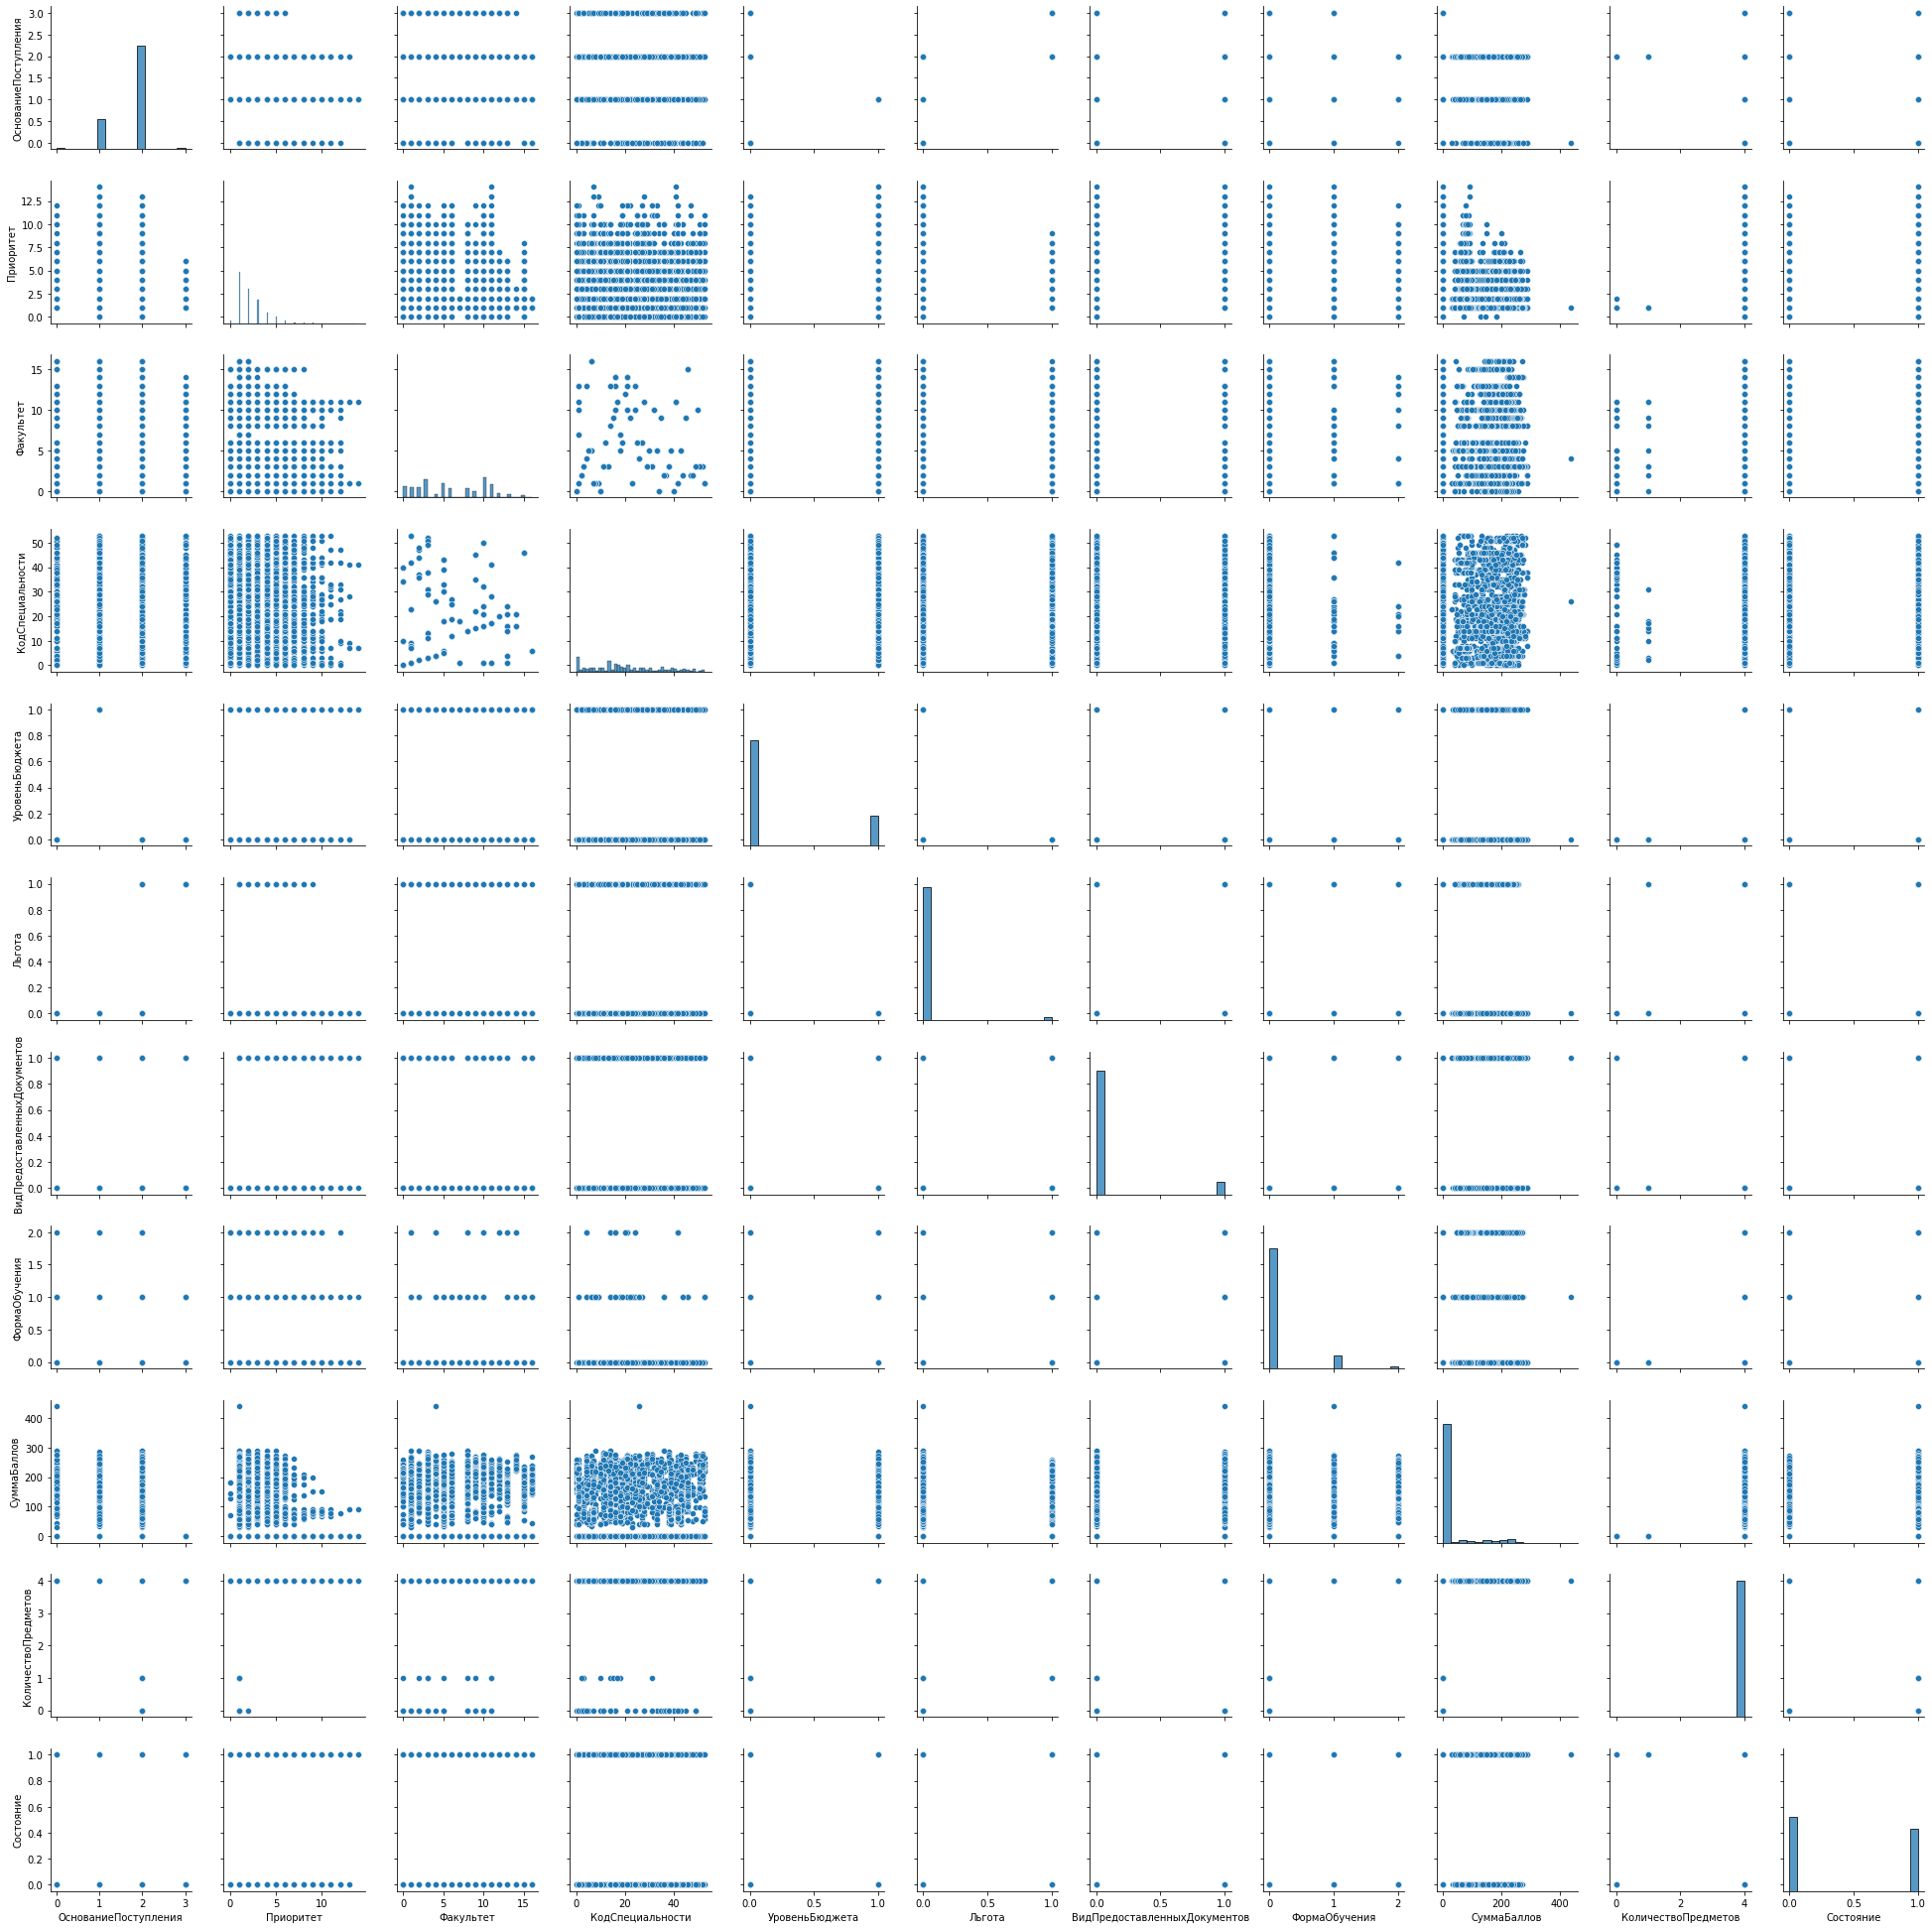

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data, kind="scatter")

Попытка найти корреляции:

In [ ]:
data.corr('spearman')

,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов,Состояние
ОснованиеПоступления,1.000000,-0.090821,-0.052087,0.062545,-0.936883,0.193189,-0.044226,-0.180501,-0.018945,-0.024626,-0.116023
Приоритет,-0.090821,1.000000,-0.057365,0.028559,0.105136,-0.016638,0.060649,-0.063334,-0.031388,0.048185,0.021873
Факультет,-0.052087,-0.057365,1.000000,0.074132,0.061824,0.022785,-0.044982,0.039833,-0.059545,0.018141,-0.025188
КодСпециальности,0.062545,0.028559,0.074132,1.000000,-0.066117,0.011338,0.012017,-0.038993,-0.008655,-0.000097,-0.001322
УровеньБюджета,-0.936883,0.105136,0.061824,-0.066117,1.000000,-0.086765,0.019248,0.187291,-0.000190,0.025283,0.105619
Льгота,0.193189,-0.016638,0.022785,0.011338,-0.086765,1.000000,0.007020,-0.023542,0.025774,-0.000602,0.042675
ВидПредоставленныхДокументов,-0.044226,0.060649,-0.044982,0.012017,0.019248,0.007020,1.000000,0.093449,0.258682,-0.017218,0.301031
ФормаОбучения,-0.180501,-0.063334,0.039833,-0.038993,0.187291,-0.023542,0.093449,1.000000,0.168956,0.017122,0.119499
СуммаБаллов,-0.018945,-0.031388,-0.059545,-0.008655,-0.000190,0.025774,0.258682,0.168956,1.000000,0.018157,0.260330
КоличествоПредметов,-0.024626,0.048185,0.018141,-0.000097,0.025283,-0.000602,-0.017218,0.017122,0.018157,1.000000,-0.025048


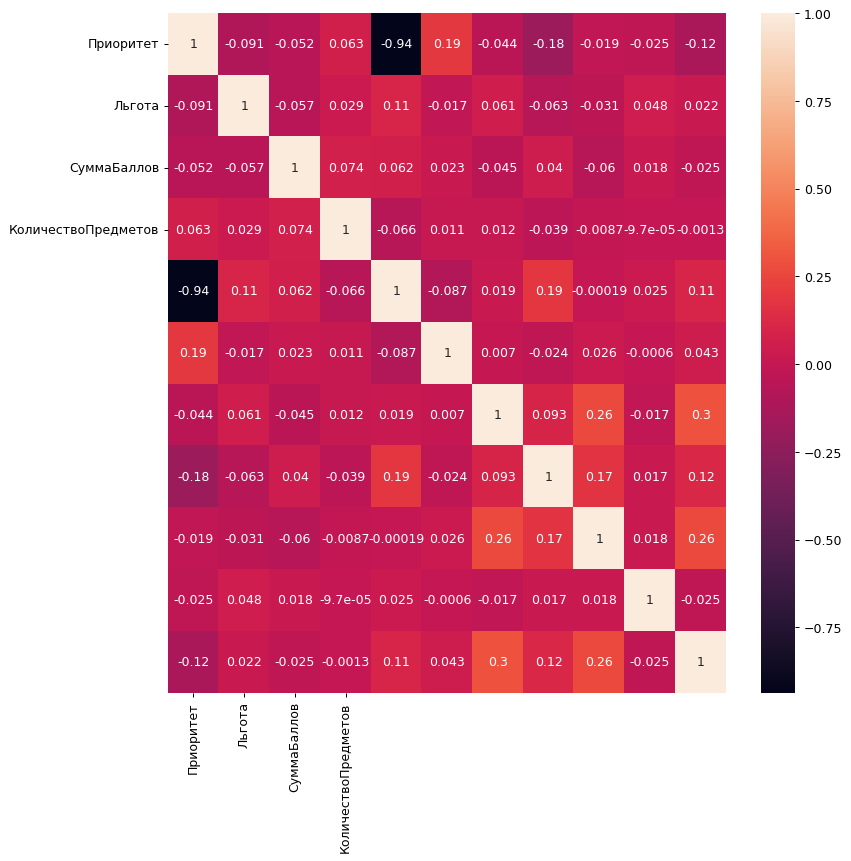

In [ ]:
plt.figure(figsize=(10,10), dpi=90)
sns.heatmap(data.corr('spearman'), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

## Построение модели

Выделение зависимой (целевой) переменной **y**

In [ ]:
y = data['Состояние']

y=y.values

Выделение независимых переменных-предикторов **X**

In [ ]:
X = data.drop(['Состояние'], axis=1)
print(X.shape)
X.head(10)

(32202, 10)


,ОснованиеПоступления,Приоритет,Факультет,КодСпециальности,УровеньБюджета,Льгота,ВидПредоставленныхДокументов,ФормаОбучения,СуммаБаллов,КоличествоПредметов
0,0,2,0,0,0,0,0,0,0,4
1,1,2,1,1,1,0,0,0,0,4
2,0,3,2,2,0,0,0,0,0,4
3,2,3,3,3,0,0,0,0,0,4
4,2,1,4,4,0,0,0,0,0,4
5,1,1,3,3,1,0,0,0,101,4
6,2,3,5,5,0,0,0,0,0,4
7,2,2,5,6,0,0,1,1,0,4
8,2,1,1,7,0,0,0,1,227,4
9,2,8,1,8,0,0,0,1,0,4


Выделим обучающую и тестовую выборки:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Произведем классификацию методом "Случайный лес":

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 =  RandomForestClassifier(n_estimators=100,
                               random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

Оценим качество предсказания с помощью кросс-таблицы:

In [ ]:
pd.crosstab(y_test, y_pred)

col_0,0,1
row_0,,
0,2970,591
1,1482,1398


Получим метрики для оценки качества классификации:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(model1.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      3561
           1       0.70      0.49      0.57      2880

    accuracy                           0.68      6441
   macro avg       0.68      0.66      0.66      6441
weighted avg       0.68      0.68      0.67      6441

0.6781555659059152


Статья про метрики https://habr.com/ru/company/ods/blog/328372/